In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [13]:
# membaca data pada csv bernama insurance dan memunculkan data bagian atas saja

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


c:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


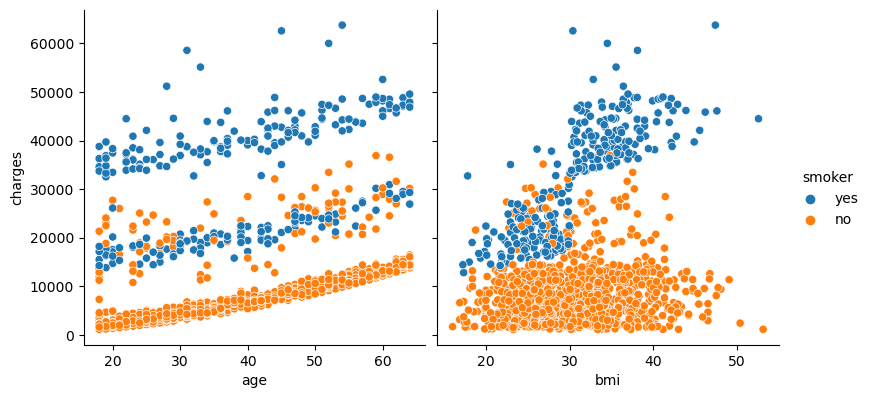

In [3]:
# no 1

sns.pairplot(data, x_vars=['age', 'bmi'],
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

# untuk membuat scatterplot matrix (pairplot) untuk memvisualisasikan hubungan antara 'age' dan 'bmi' terhadap 'charges', dengan pemisahan warna berdasarkan status 'smoker' pada dataset yang digunakan.

C:\Users\asus\AppData\Local\Temp\ipykernel_16496\2404367070.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


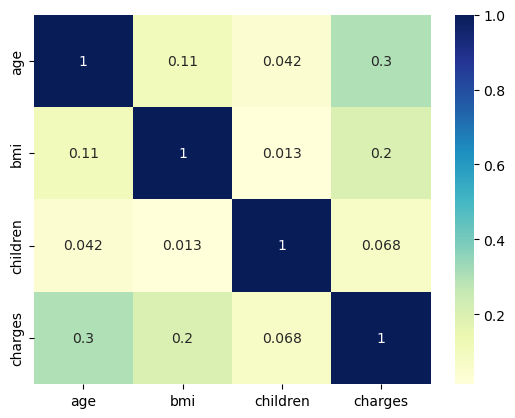

In [4]:
# no 2

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()


le = LabelEncoder()

data['smoker'] = le.fit_transform(data['smoker'])

# membantu dalam menganalisis korelasi antara variabel-variabel dalam dataset dan mengubah data kategorikal 'smoker' menjadi format numerik untuk keperluan pemodelan.

In [5]:
# no 3
X = data[['age', 'bmi', 'smoker']]
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# untuk melatih dan menguji model regresi linear atau model lainnya pada data latih dan data uji yang telah dipisahkan.

In [7]:
model = LinearRegression()

# untuk membuat objek model regresi linear menggunakan library scikit-learn. 

In [9]:
# no 4

model.fit(X_train, y_train)

print(f"Intercept B0: {model.intercept_}")
print(f"Koefisien Regressi: {model.coef_}")

#  memberikan informasi tentang bagaimana model regresi linear telah menyesuaikan diri dengan data latih, dengan intercept dan koefisien regresi yang digunakan untuk membuat prediksi.

Intercept B0: -10266.243741232487
Koefisien Regressi: [  254.73532215   282.19998015 23473.68627484]


In [10]:
y_pred = model.predict(X_test)

# Melakukan prediksi dengan model regresi linear pada data uji (X_test)

### Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [14]:
# Mengukur kinerja model dengan metrik R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Mengukur kinerja model dengan metrik Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mengukur kinerja model dengan metrik Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mencetak hasil pengukuran kinerja model
print(f"\nR-squared (R2): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")


R-squared (R2): 0.77
MAE (Mean Absolute Error): 4132.80
MSE (Mean Squared Error): 36285171.50
